In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## Loading GDSC raw data

In [2]:
GDSC1 = "https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.4/GDSC1_public_raw_data_24Jul22.csv.zip"
GDSC2 = "https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.4/GDSC2_public_raw_data_24Jul22.csv.zip"

In [3]:
#Conbining the raw datasets 
GDSC1_df = pd.read_csv(GDSC1)
GDSC2_df = pd.read_csv(GDSC2)
GDSC_combined_df = pd.concat([GDSC1_df,GDSC2_df])
print(GDSC_combined_df.shape)
GDSC_combined_df.head()

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_10276\4001120376.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  GDSC1_df = pd.read_csv(GDSC1)


(21045632, 19)


,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,1,B,NaN,NaN,26022
1,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,2,B,NaN,NaN,20491
2,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,3,UN-USED,NaN,NaN,181946
3,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,4,UN-USED,NaN,NaN,213387
4,Sanger_GDSC1,100541,1765,2010-04-18T23:00:00Z,NaN,2415,365,924238,K5,SIDM00056,250.0,505_a_5,a,3.0,5,UN-USED,NaN,NaN,166452


In [5]:
# Number of unique plates
Plate_ids = GDSC_combined_df.BARCODE.unique()
len(Plate_ids)

40252

In [8]:
# Number of unique cell lines
len(GDSC_combined_df.CELL_LINE_NAME.unique())

978

In [9]:
# Number of unique drugs
len(GDSC_combined_df.DRUG_ID.unique())

627

In [6]:
# Grouping by plate layout (Drugset_id) and getting the count of the number of plates usingin this layout and their max wells
group_test = GDSC_combined_df.groupby(["DRUGSET_ID"]).agg({"BARCODE":pd.Series.nunique,'POSITION':'max'})
group_test

,BARCODE,POSITION
DRUGSET_ID,,
158,284,1536
159,890,1536
217,605,1536
231,476,1536
264,98,1536
...,...,...
714_i_17,36,384
714_j_16,51,384
714_j_17,6,384


In [14]:
# Grouping by plate id and getting  their max wells
Wells = GDSC_combined_df.groupby(["BARCODE"]).agg({'POSITION':'max'})
Well_count = Wells.value_counts()
Well_count[:3]


POSITION
384         20356
1536        16354
96           3527
dtype: int64

In [9]:
from matplotlib import pyplot as plt
import numpy as np

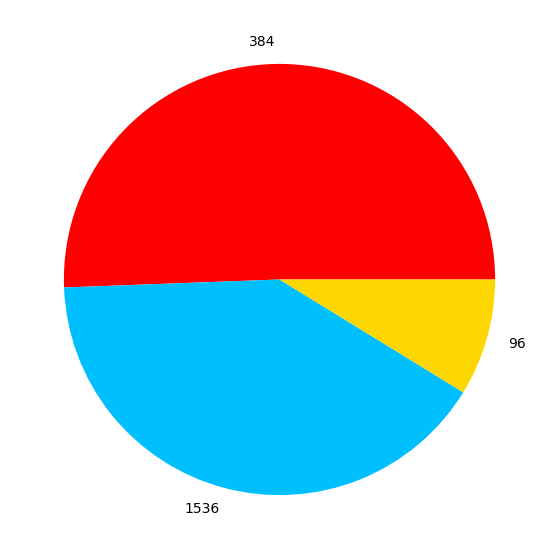

In [16]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(Well_count[:3],labels = [384,1536, 96], colors=["red","deepskyblue","gold"])
 
# show plot
plt.show()

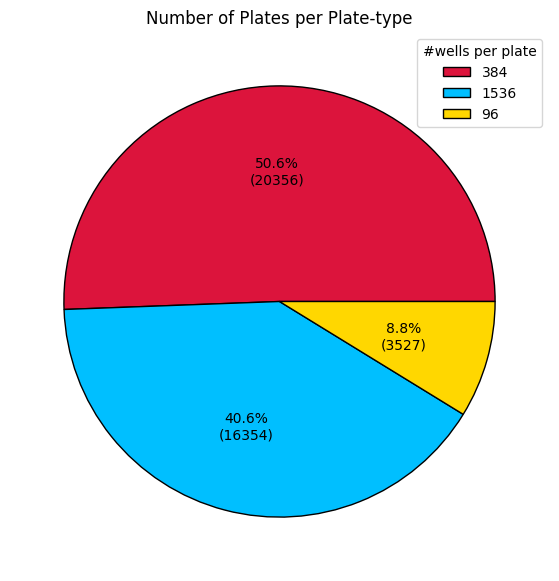

In [37]:
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts= ax.pie(Well_count[:3],
                                  autopct = lambda pct: func(pct, Well_count[:3]),
                                  #explode = explode,
                                  #labels = [384, 1536, 96],
                                  #shadow = True,
                                  colors = ["crimson","deepskyblue","gold"],
                                  #startangle = 90,
                                  wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, [384,1536, 96],
          title ="#wells per plate",
          loc ="upper right")#,
          #bbox_to_anchor =(1, 0, 0.5, 1))
 
#plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Number of Plates per Plate-type")
 
# show plot
plt.show()

In [4]:
Cell_line_summary = GDSC_combined_df.groupby(["CELL_LINE_NAME"]).agg({"BARCODE":pd.Series.nunique})
Cell_line_summary

,BARCODE
CELL_LINE_NAME,
22RV1,33
23132-87,33
42-MG-BA,31
451Lu,25
5637,33
...,...
YT,51
ZR-75-30,62
huH-1,32


In [5]:
Cell_line_details = pd.read_excel("https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.4/Cell_Lines_Details.xlsx")
Cell_line_details.head()

c:\program files\python39\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [6]:
Cell_line_join = pd.merge(Cell_line_summary, Cell_line_details[['Sample Name','GDSC\nTissue descriptor 1']], left_index=True, right_on="Sample Name")
Cell_line_join.head()

,BARCODE,Sample Name,GDSC\nTissue descriptor 1
912,33,22RV1,urogenital_system
386,33,23132-87,digestive_system
628,31,42-MG-BA,nervous_system
743,25,451Lu,skin
831,34,639-V,urogenital_system


In [7]:
Cell_lines_grouped = Cell_line_join.groupby(["GDSC\nTissue descriptor 1"]).agg({"Sample Name":pd.Series.nunique, "BARCODE":sum})
Cell_lines_grouped

,Sample Name,BARCODE
GDSC Tissue descriptor 1,,
aero_dig_tract,75,2342
bone,38,2021
breast,52,3647
digestive_system,43,1393
kidney,34,985
large_intestine,46,3129
leukemia,82,3534
lung,7,233
lung_NSCLC,107,4084


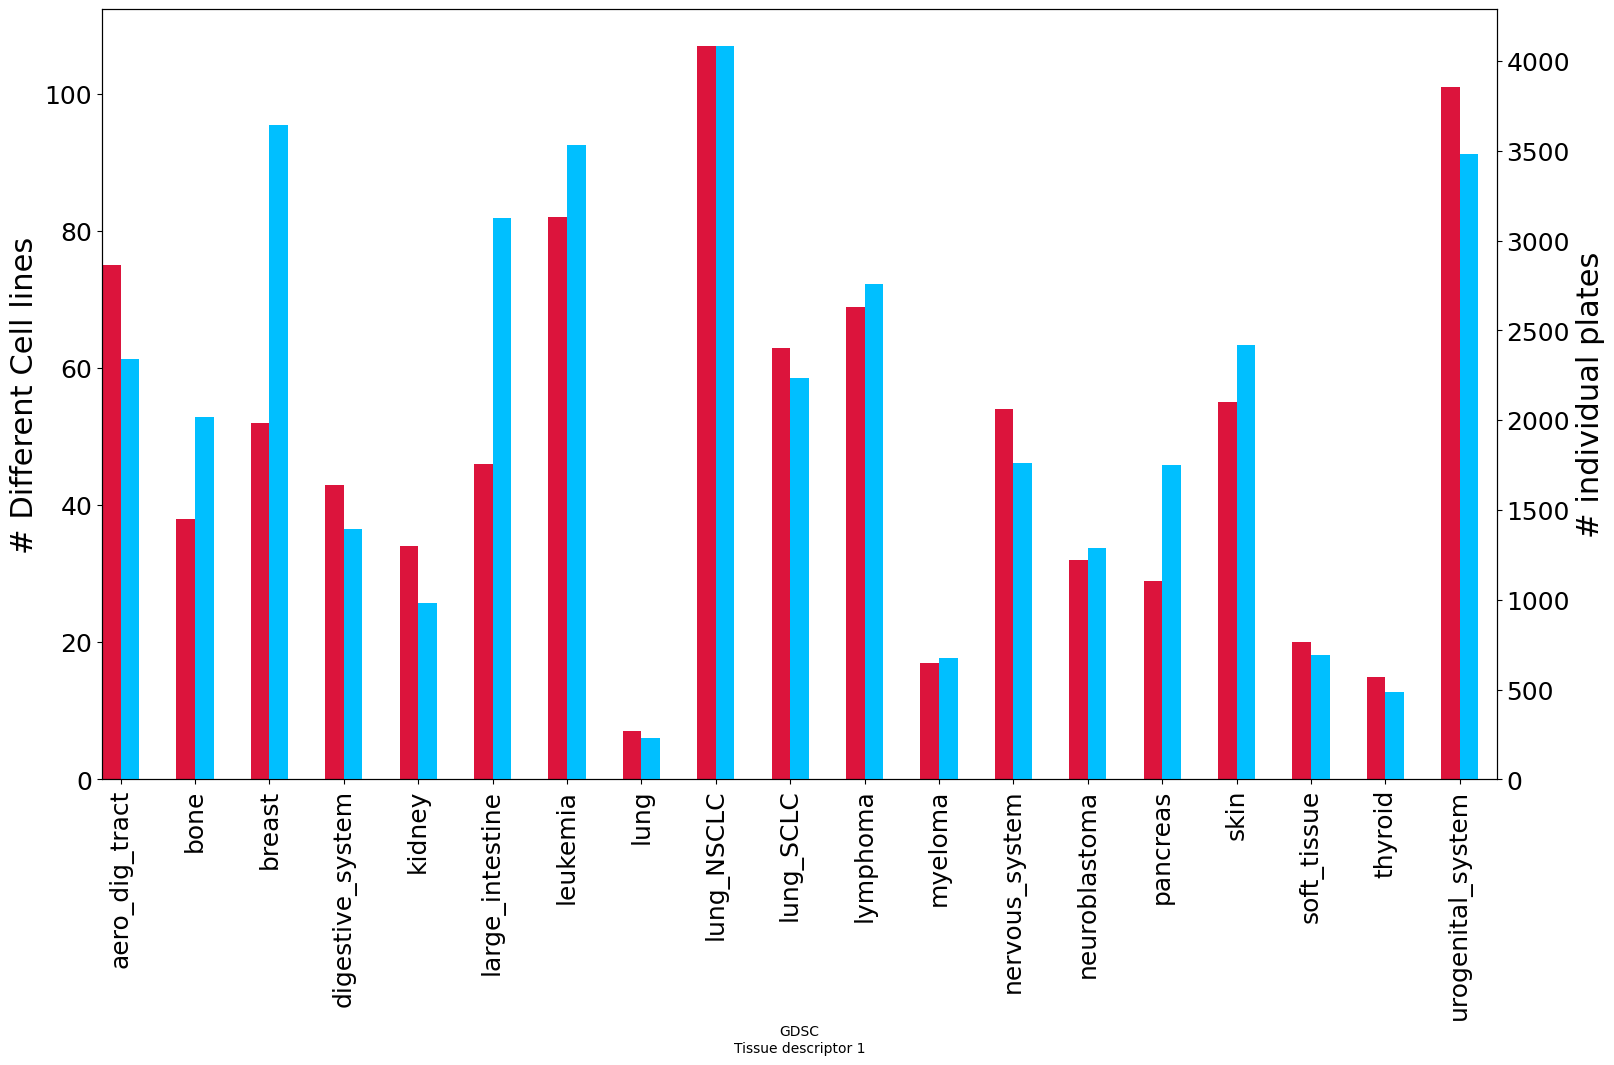

In [11]:
fig = plt.figure(figsize =(18, 10))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.25
Cell_lines_grouped["Sample Name"].plot(kind='bar',color = "crimson",ax=ax,width=width, position = 1,fontsize=18)
Cell_lines_grouped["BARCODE"].plot(kind='bar',color = "deepskyblue",ax=ax2,width=width, position = 0,fontsize=18)
ax.set_ylabel('# Different Cell lines',fontsize=22)
ax2.set_ylabel('# individual plates',fontsize=22)

plt.show()

In [12]:
Drug_target_details = pd.read_csv("https://cog.sanger.ac.uk/cancerrxgene/GDSC_release8.4/screened_compounds_rel_8.4.csv")
Drug_target_details.head()

,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,MGH,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,MGH,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,MGH,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,MGH,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MGH,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation


In [13]:
Drugs = GDSC_combined_df[["DRUG_ID","CELL_LINE_NAME"]]
Drugs

,DRUG_ID,CELL_LINE_NAME
0,NaN,K5
1,NaN,K5
2,NaN,K5
3,NaN,K5
4,NaN,K5
...,...,...
15069444,NaN,Hs-766T
15069445,NaN,Hs-766T
15069446,NaN,Hs-766T
15069447,NaN,Hs-766T


In [14]:
Drug_join = pd.merge(Drugs, Drug_target_details[['DRUG_ID','TARGET_PATHWAY']], left_on="DRUG_ID", right_on="DRUG_ID")
Drug_join.head()

,DRUG_ID,CELL_LINE_NAME,TARGET_PATHWAY
0,1007.0,K5,Mitosis
1,1007.0,K5,Mitosis
2,1007.0,K5,Mitosis
3,1007.0,K5,Mitosis
4,1007.0,K5,Mitosis


In [15]:
Drugs_grouped = Drug_join.groupby(["TARGET_PATHWAY"]).agg({"DRUG_ID":pd.Series.nunique, "CELL_LINE_NAME":pd.Series.nunique})
Drugs_grouped

,DRUG_ID,CELL_LINE_NAME
TARGET_PATHWAY,,
ABL signaling,2,976
Apoptosis regulation,23,976
Cell cycle,28,978
Chromatin histone acetylation,29,977
Chromatin histone methylation,20,976
Chromatin other,17,976
Cytoskeleton,13,977
DNA replication,35,976
EGFR signaling,12,977


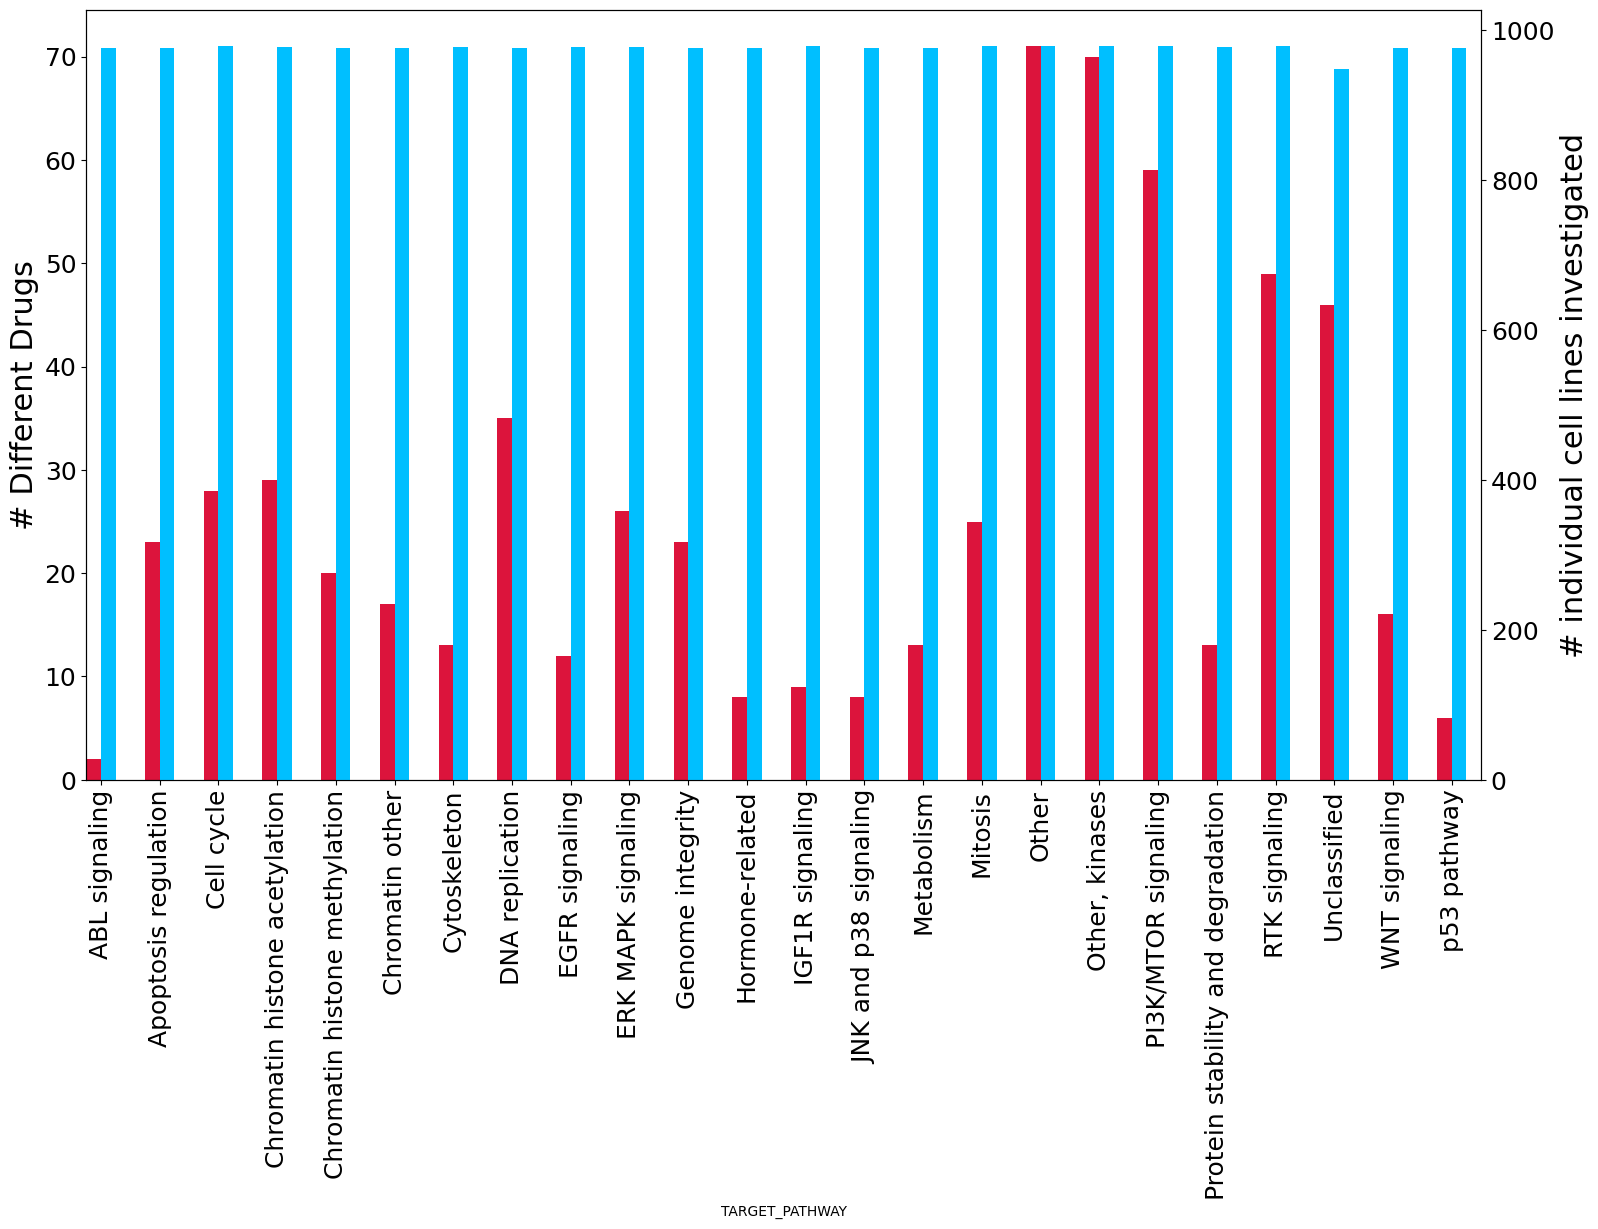

In [16]:
fig = plt.figure(figsize =(18, 10))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.25
Drugs_grouped["DRUG_ID"].plot(kind='bar',color = "crimson",ax=ax,width=width, position = 1,fontsize=18)
Drugs_grouped["CELL_LINE_NAME"].plot(kind='bar',color = "deepskyblue",ax=ax2,width=width, position = 0,fontsize=18)
ax.set_ylabel('# Different Drugs',fontsize=22)
ax2.set_ylabel('# individual cell lines investigated',fontsize=22)

plt.show()

In [ ]:
#dropping unused rows
drop_unused = (GDSC_combined_df[GDSC_combined_df.TAG!="UN-USED"])
drop_unused.shape

### Identifying which plates use which controls

In [ ]:
layouts_w_NC0 = drop_unused[drop_unused.TAG=='NC-0'].DRUGSET_ID.unique()
len(layouts_w_NC0)

### Therefore all plates have NC-0

230

In [ ]:
layouts_w_NC1 = drop_unused[drop_unused.TAG=='NC-1'].DRUGSET_ID.unique()
len(layouts_w_NC1)

86

In [ ]:
layouts_w_PC1 = drop_unused[drop_unused.TAG=='PC-1'].DRUGSET_ID.unique()
len(layouts_w_PC1)

3

In [ ]:
layouts_w_titred_PC1 = drop_unused[drop_unused.TAG.str.startswith('PC1-D')].DRUGSET_ID.unique()
len(layouts_w_titred_PC1)

83

In [ ]:
layouts_w_titred_PC2 = drop_unused[drop_unused.TAG.str.startswith('PC2-D')].DRUGSET_ID.unique()
len(layouts_w_titred_PC2)

83

In [ ]:
nine_fold = drop_unused[drop_unused.TAG.str.endswith('D9-S')].DRUGSET_ID.unique()
len(nine_fold)

83

In [ ]:
layouts_w_DMSO = drop_unused[drop_unused.TAG=='DMSO'].DRUGSET_ID.unique()
len(layouts_w_DMSO)

79

In [ ]:
group_test.reset_index(inplace=True)
group_test

,DRUGSET_ID,BARCODE,POSITION
0,158,284,1536
1,159,890,1536
2,217,605,1536
3,231,476,1536
4,264,98,1536
...,...,...,...
225,714_i_17,36,384
226,714_j_16,51,384
227,714_j_17,6,384
228,714_k_16,10,384


### Summary table of layout, # of plates for the layout, well count and what control wells used. Also included indictor for plate which did assays in sets of 9 wells rather than 5 

In [ ]:
group_test['NC-0']=np.where(group_test.DRUGSET_ID.isin(layouts_w_NC0),True,False)
group_test['NC-1']=np.where(group_test.DRUGSET_ID.isin(layouts_w_NC1),True,False)
group_test['PC-1']=np.where(group_test.DRUGSET_ID.isin(layouts_w_PC1),True,False)
group_test['Titred PC-1']=np.where(group_test.DRUGSET_ID.isin(layouts_w_titred_PC1),True,False)
group_test['Titred PC-2']=np.where(group_test.DRUGSET_ID.isin(layouts_w_titred_PC2),True,False)
group_test['nine_fold']=np.where(group_test.DRUGSET_ID.isin(nine_fold),True,False)
group_test['DMSO']=np.where(group_test.DRUGSET_ID.isin(layouts_w_DMSO),True,False)
group_test

,DRUGSET_ID,BARCODE,POSITION,NC-0,NC-1,PC-1,Titred PC-1,Titred PC-2,nine_fold,DMSO
0,158,284,1536,True,True,True,False,False,False,False
1,159,890,1536,True,True,True,False,False,False,False
2,217,605,1536,True,True,True,False,False,False,False
3,231,476,1536,True,True,False,True,True,False,False
4,264,98,1536,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
225,714_i_17,36,384,True,False,False,False,False,False,False
226,714_j_16,51,384,True,False,False,False,False,False,False
227,714_j_17,6,384,True,False,False,False,False,False,False
228,714_k_16,10,384,True,False,False,False,False,False,False


In [ ]:
# Number of plates by there different sizes
group_test.POSITION.value_counts()

384     130
1536     86
96       14
Name: POSITION, dtype: int64

In [ ]:
group_test['NC-1'].value_counts()

False    144
True      86
Name: NC-1, dtype: int64

In [ ]:
group_test.nine_fold.value_counts()

False    147
True      83
Name: nine_fold, dtype: int64

In [ ]:
group_test[group_test.nine_fold==True]

,DRUGSET_ID,BARCODE,POSITION,NC-0,NC-1,PC-1,Titred PC-1,Titred PC-2,nine_fold,DMSO
86,14_a_7,241,384,True,False,False,False,False,True,False
87,15_a_7,282,384,True,False,False,False,False,True,False
88,16_a_7,245,384,True,False,False,False,False,True,False
89,16_b_7,23,384,True,False,False,False,False,True,False
90,17_a_7,963,384,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
164,508_f_16,22,384,True,False,False,False,False,True,False
165,508_g_16,28,384,True,False,False,False,False,True,False
166,508_g_5,27,384,True,False,False,False,False,True,False
167,508_h_16,19,384,True,False,False,False,False,True,False


In [ ]:
# of unique plates
drop_unused.BARCODE.nunique()

40251

## Identifying triplicates

In [ ]:
#getting list of unique plate layouts
layout_list = list(drop_unused.DRUGSET_ID.unique())

In [ ]:
#Grouping the raw dataset by number of plates with the same layout and cell line

Layout_cell_line_grouped = GDSC_combined_df.groupby(["DRUGSET_ID","CELL_LINE_NAME"]).agg({"BARCODE":pd.Series.nunique})
Layout_cell_line_grouped

BARCODE
DRUGSET_ID CELL_LINE_NAME         
158        23132-87              1
           42-MG-BA              1
           5637                  1
           639-V                 1
           647-V                 1
...                            ...
714_k_17   MFM-223               3
           MHH-ES-1              3
           PC-14                 3
           SK-MEL-2              3
           SW620                 3

[33931 rows x 1 columns]

In [ ]:
#Extracting layouts+cell lines where there are triplicate plates

Triplicate_layouts = Layout_cell_line_grouped[Layout_cell_line_grouped.BARCODE ==3]
Triplicate_layouts

BARCODE
DRUGSET_ID CELL_LINE_NAME         
158        HCC-78                3
           NUGC-3                3
159        DiFi                  3
           HC-1                  3
231        A3-KAW                3
...                            ...
714_k_17   MFM-223               3
           MHH-ES-1              3
           PC-14                 3
           SK-MEL-2              3
           SW620                 3

[515 rows x 1 columns]

### This function will return the Barcodes to identify plates for a given layout and cell line

In [ ]:

def barcode_fetcher(plate_layout,cell_line):
    plate_df = drop_unused[(drop_unused.DRUGSET_ID == plate_layout) & (drop_unused.CELL_LINE_NAME==cell_line)]
    return list(plate_df.BARCODE.unique())

In [ ]:
barcode_fetcher(158,'HCC-78')

[6617, 6864, 7265]

In [ ]:
group_test[group_test['DRUGSET_ID'] ==158]

,DRUGSET_ID,BARCODE,POSITION,NC-0,NC-1,PC-1,Titred PC-1,Titred PC-2,nine_fold,DMSO
0,158,284,1536,True,True,True,False,False,False,False


In [ ]:
barcode_fetcher('714_k_17','MFM-223')

['127950', '127955', '127945']

In [ ]:
group_test[group_test['DRUGSET_ID'] =='714_k_17']

,DRUGSET_ID,BARCODE,POSITION,NC-0,NC-1,PC-1,Titred PC-1,Titred PC-2,nine_fold,DMSO
229,714_k_17,24,384,True,False,False,False,False,False,False


### For simplicity, will work only with plates that only use the NC-0 and B controls

In [ ]:
Only_NC0 = group_test[(group_test['NC-1']==False)&
                      (group_test['PC-1']==False)&
                      (group_test['Titred PC-1']==False)&
                      (group_test['Titred PC-2']==False)&
                      (group_test['DMSO']==False)]
Only_NC0

,DRUGSET_ID,BARCODE,POSITION,NC-0,NC-1,PC-1,Titred PC-1,Titred PC-2,nine_fold,DMSO
86,14_a_7,241,384,True,False,False,False,False,True,False
87,15_a_7,282,384,True,False,False,False,False,True,False
88,16_a_7,245,384,True,False,False,False,False,True,False
89,16_b_7,23,384,True,False,False,False,False,True,False
90,17_a_7,963,384,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
225,714_i_17,36,384,True,False,False,False,False,False,False
226,714_j_16,51,384,True,False,False,False,False,False,False
227,714_j_17,6,384,True,False,False,False,False,False,False
228,714_k_16,10,384,True,False,False,False,False,False,False


In [ ]:
Only_NC0_layout_list = Only_NC0.DRUGSET_ID.to_list()

In [ ]:
Triplicate_layouts.loc['714_k_17']

,BARCODE
CELL_LINE_NAME,
A375,3
A549,3
C32,3
MFM-223,3
MHH-ES-1,3
PC-14,3
SK-MEL-2,3
SW620,3


In [ ]:
Trip_layout_list = list(set(Triplicate_layouts.index.get_level_values(0).to_list()))
Trip_layout_list[:10]

['26_b_7', '505_a_16', 517, 519, 525, 527, 529, '406_a_9', 545, 547]

In [ ]:
NC0_in_trip = list(set(Only_NC0_layout_list).intersection(Trip_layout_list))
len(NC0_in_trip)

57

### Below are the layouts+cell lines with triplicate plates using only NC-0 and B ass controls

In [ ]:
Only_NCO_Trips = Triplicate_layouts.loc[NC0_in_trip]
Only_NCO_Trips

BARCODE
DRUGSET_ID CELL_LINE_NAME         
26_b_7     NCI-H2141             3
505_a_16   ML-2                  3
           SBC-1                 3
714_k_16   RPMI-8226             3
411_a_9    RPMI-6666             3
...                            ...
713_a_17   MKN28                 3
           NB69                  3
           PC-14                 3
           SK-MEL-2              3
           SW620                 3

[317 rows x 1 columns]

In [ ]:
NC0_in_trip[-20:]

['714_i_16',
 '711_b_17',
 '714_h_17',
 '711_d_17',
 '18_a_7',
 '403_a_9',
 '28_b_7',
 '506_f_6',
 '25_a_7',
 '712_f_17',
 '15_a_7',
 '22_a_7',
 '505_a_6',
 '17_a_7',
 '26_a_7',
 '21_b_7',
 '408_a_9',
 '402_a_9',
 '26_c_7',
 '713_a_17']

In [ ]:
len(NC0_in_trip)

57

In [ ]:
Only_NCO_Trips.loc['713_m_17']

,BARCODE
CELL_LINE_NAME,
A549,3
C32,3
MFM-223,3
MHH-ES-1,3
PC-14,3
SK-MEL-2,3
SW620,3
SiHa,3


In [ ]:
barcode_fetcher('714_b_17','C32')

[115848, 115761, '115853']

In [ ]:
#exploring for the '714_b_17' layout, C32 cell line and 1375 drug

P_714_b_17_CL_C32_D_1375  = drop_unused[(drop_unused.BARCODE.isin([115848, 115761, '115853']))&(drop_unused.DRUG_ID==1375)]
P_714_b_17_CL_C32_D_1375

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
2637606,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,61,L7-D1-S,1375.0,30.000000,270189
2637607,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,62,L7-D2-S,1375.0,7.500000,264862
2637608,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,63,L7-D3-S,1375.0,1.875000,267270
2637609,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,64,L7-D4-S,1375.0,0.468750,258850
2637610,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,65,L7-D5-S,1375.0,0.117188,269534
2642677,Sanger_GDSC1,115761,58229,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1800.0,714_b_17,a,3.0,61,L7-D1-S,1375.0,30.000000,246600
2642678,Sanger_GDSC1,115761,58229,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1800.0,714_b_17,a,3.0,62,L7-D2-S,1375.0,7.500000,279440
2642679,Sanger_GDSC1,115761,58229,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1800.0,714_b_17,a,3.0,63,L7-D3-S,1375.0,1.875000,277995
2642680,Sanger_GDSC1,115761,58229,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1800.0,714_b_17,a,3.0,64,L7-D4-S,1375.0,0.468750,267388
2642681,Sanger_GDSC1,115761,58229,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1800.0,714_b_17,a,3.0,65,L7-D5-S,1375.0,0.117188,259252


In [ ]:
P_714_b_17_CL_C32_D_1375.shape

(15, 19)

In [ ]:
#selecting columns of interest

tidy_test = P_714_b_17_CL_C32_D_1375[['CELL_LINE_NAME','DRUG_ID','BARCODE','CONC','INTENSITY']]
tidy_test

,CELL_LINE_NAME,DRUG_ID,BARCODE,CONC,INTENSITY
2637606,C32,1375.0,115848,30.000000,270189
2637607,C32,1375.0,115848,7.500000,264862
2637608,C32,1375.0,115848,1.875000,267270
2637609,C32,1375.0,115848,0.468750,258850
2637610,C32,1375.0,115848,0.117188,269534
2642677,C32,1375.0,115761,30.000000,246600
2642678,C32,1375.0,115761,7.500000,279440
2642679,C32,1375.0,115761,1.875000,277995
2642680,C32,1375.0,115761,0.468750,267388
2642681,C32,1375.0,115761,0.117188,259252


In [ ]:
30/7.5

4.0

In [ ]:
7.5/4

1.875

## Normalisation

"Now the data can be normalized. By normalization we mean converting the raw fluourescence intensities for the treated wells (the read-out from the assay) to a cell viability value between 0 and 1. We assume that the dynamic range for the cell viability is bounded by the mean of the positive controls ($\mu_{pos}$) and the mean of the negative controls ($\mu_{neg}$), equivalent to a viablilty of 0 and 1 respectively. The normalization is always done on a per plate basis."

"$$viability = \frac{intensity - \mu_{pos} }{ \mu_{neg} - \mu_{pos}}$$"

In [ ]:
drop_unused.loc[(drop_unused.BARCODE==115848)&(drop_unused.TAG=='B')].head()

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
2637566,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,1,B,NaN,NaN,14510
2637590,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,25,B,NaN,NaN,16091
2637604,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,49,B,NaN,NaN,15556
2637618,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,73,B,NaN,NaN,14987
2637627,Sanger_GDSC1,115848,58183,2013-02-28T00:00:00Z,NaN,2003,2242,906830,C32,SIDM00890,1700.0,714_b_17,a,3.0,97,B,NaN,NaN,15356


In [ ]:
drop_unused.loc[(drop_unused.BARCODE==115848)&(drop_unused.TAG=='B'),'INTENSITY'].mean()

15146.0

In [ ]:
#exploring how to get mean pos and neg controls from 3 selected plates

plates_test_norm = [115848, 115761, '115853']
pos_controls = {}
neg_controls = {}
for plate in plates_test_norm:
    mean_pos = drop_unused.loc[(drop_unused.BARCODE==plate)&(drop_unused.TAG=='B'),'INTENSITY'].mean()
    # note - using NC-0 as negative control was not restricting between 0 and 1. 
    # Appears there can be cases where the untreeated wells do not actually have the highest intensity e.g low drug treated wells 
    # could be higher. Decided to use max intensitiy well per plate as the neg contorl to overcome this
    mean_neg = drop_unused.loc[(drop_unused.BARCODE==plate),'INTENSITY'].max()
    #mean_neg = drop_unused.loc[(drop_unused.BARCODE==plate)&(drop_unused.TAG=='NC-0'),'INTENSITY'].mean()
    pos_controls[plate]=mean_pos
    neg_controls[plate]=mean_neg

neg_controls

{115848: 343178, 115761: 318420, '115853': 318442}

In [ ]:
tidy_test['mean_pos'] = tidy_test['BARCODE'].map(pos_controls)
tidy_test['mean_neg'] = tidy_test['BARCODE'].map(neg_controls)
tidy_test['Norm'] = ((tidy_test.INTENSITY-tidy_test.mean_pos)/(tidy_test.mean_neg-tidy_test.mean_pos))
tidy_test.head()

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\2997239032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_test['mean_pos'] = tidy_test['BARCODE'].map(pos_controls)
C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\2997239032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_test['mean_neg'] = tidy_test['BARCODE'].map(neg_controls)
C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\2997239032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,CELL_LINE_NAME,DRUG_ID,BARCODE,CONC,INTENSITY,mean_pos,mean_neg,Norm
2637606,C32,1375.0,115848,30.000000,270189,15146.0,343178,0.777494
2637607,C32,1375.0,115848,7.500000,264862,15146.0,343178,0.761255
2637608,C32,1375.0,115848,1.875000,267270,15146.0,343178,0.768596
2637609,C32,1375.0,115848,0.468750,258850,15146.0,343178,0.742928
2637610,C32,1375.0,115848,0.117188,269534,15146.0,343178,0.775498


In [ ]:
tidy_test.tail()

,CELL_LINE_NAME,DRUG_ID,BARCODE,CONC,INTENSITY,mean_pos,mean_neg,Norm
2660145,C32,1375.0,115853,30.000000,260617,13791.375,318442,0.810192
2660146,C32,1375.0,115853,7.500000,259550,13791.375,318442,0.806690
2660147,C32,1375.0,115853,1.875000,263674,13791.375,318442,0.820227
2660148,C32,1375.0,115853,0.468750,259480,13791.375,318442,0.806460
2660149,C32,1375.0,115853,0.117188,250903,13791.375,318442,0.778307


In [ ]:
#tidy_test['Norm'] = tidy_test.apply(lambda x: (x.INTENSITY - mean_controls[x.BARCODE][0])/mean_controls[x.BARCODE][1]-mean_controls[x.BARCODE][0],axis=1)

In [ ]:
# spot-checking maths
(270189-15146.0)/(260966.41666666666-15146.0)

1.0375175644822017

#### Normalising drug conc
This scale is set with the maximum concentration at 9 because the original GDSC data used a 9 point 2 fold dilution for each drug treatment, hence dilution points from 9 down to 1. Newer data has adopted different dilution ranges but the maximum of 9 has been kept and so the same function can be used to normalize the concentration scale.

"maxc is the maximum concentration for that drug treatment in micromolar.

x is the concentration on a scale up to 9, where:"

$$ x = ~ \frac{log\frac{CONC}{maxc}}{log(2)} + 9$$

In [ ]:
tidy_test.loc[:,'CONC'].max()

30.0

In [ ]:
tidy_test.CONC.nunique()

5

In [ ]:
tidy_test['norm_dose']=((np.log(tidy_test['CONC']/tidy_test.loc[:,'CONC'].max()))/np.log(2))+9
tidy_test.head()

#drop_unused.loc[(drop_unused.BARCODE==plate),'INTENSITY'].max()

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\3313928020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_test['norm_dose']=((np.log(tidy_test['CONC']/tidy_test.loc[:,'CONC'].max()))/np.log(2))+9


,CELL_LINE_NAME,DRUG_ID,BARCODE,CONC,INTENSITY,mean_pos,mean_neg,Norm,norm_dose
2637606,C32,1375.0,115848,30.000000,270189,15146.0,343178,0.777494,9.0
2637607,C32,1375.0,115848,7.500000,264862,15146.0,343178,0.761255,7.0
2637608,C32,1375.0,115848,1.875000,267270,15146.0,343178,0.768596,5.0
2637609,C32,1375.0,115848,0.468750,258850,15146.0,343178,0.742928,3.0
2637610,C32,1375.0,115848,0.117188,269534,15146.0,343178,0.775498,1.0


##  Testing Curve fitting

### Trying method from here https://jbloomlab.github.io/neutcurve/curvefits_example.html 
### This method didn't really work for me

In [ ]:
#pip install neutcurve

In [ ]:
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

In [ ]:
rename_dict = {'CELL_LINE_NAME':'serum',
               'DRUG_ID':'virus',
               'BARCODE':'replicate',
               'CONC':'concentration',
               'Norm':'fraction infectivity'}

In [ ]:
tidy_renamed = tidy_test[['CELL_LINE_NAME','DRUG_ID','BARCODE','CONC','Norm']]
tidy_renamed.rename(columns=rename_dict, inplace=True)
tidy_renamed.head()

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\2928074161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_renamed.rename(columns=rename_dict, inplace=True)


,serum,virus,replicate,concentration,fraction infectivity
2637606,C32,1375.0,115848,30.000000,0.777494
2637607,C32,1375.0,115848,7.500000,0.761255
2637608,C32,1375.0,115848,1.875000,0.768596
2637609,C32,1375.0,115848,0.468750,0.742928
2637610,C32,1375.0,115848,0.117188,0.775498


In [ ]:
fits = neutcurve.CurveFits(tidy_renamed)

### Trying other method from here https://gist.github.com/yannabraham/5f210fed773785d8b638

In [ ]:
#pip install seaborn

In [ ]:
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))

In [ ]:
tidy_2 = tidy_test.loc[:,['DRUG_ID','CONC',"Norm"]]
tidy_2['logDose'] = pDose(tidy_2.CONC)
tidy_2['norm_dose']=((np.log10(tidy_2['CONC']/tidy_2.loc[:,'CONC'].max()))/np.log10(2))+9
tidy_2

,DRUG_ID,CONC,Norm,logDose,norm_dose
2637606,1375.0,30.000000,0.777494,4.522879,9.0
2637607,1375.0,7.500000,0.761255,5.124939,7.0
2637608,1375.0,1.875000,0.768596,5.726999,5.0
2637609,1375.0,0.468750,0.742928,6.329059,3.0
2637610,1375.0,0.117188,0.775498,6.931119,1.0
2642677,1375.0,30.000000,0.763850,4.522879,9.0
2642678,1375.0,7.500000,0.871830,5.124939,7.0
2642679,1375.0,1.875000,0.867079,5.726999,5.0
2642680,1375.0,0.468750,0.832202,6.329059,3.0
2642681,1375.0,0.117188,0.805451,6.931119,1.0


In [ ]:
def ll4(x,b,c,d,e):
    '''This function is basically a copy of the LL.4 function from the R drc package with
     - b: hill slope
     - c: min response
     - d: max response
     - e: EC50'''
    return(c+(d-c)/(1+np.exp(b*(np.log(x)-np.log(e)))))

In [ ]:
compoundData = tidy_2.groupby(['DRUG_ID'])
fitData = []
for name,group in compoundData:
    fitCoefs, covMatrix = opt.curve_fit(ll4, group.norm_dose, group.Norm)
    resids = group.Norm-group.norm_dose.apply(lambda x: ll4(x,*fitCoefs))
    curFit = dict(zip(['b','c','d','e'],fitCoefs))
    curFit['compound']=name
    curFit['residuals']=sum(resids**2)
    fitData.append(curFit)
fitCompound = [ item['compound'] for item in fitData]


C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\3159691884.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


In [ ]:
fitCompound

[1375.0]

In [ ]:
fitData

[{'b': 32.07065749394005,
  'c': 0.8052459483748621,
  'd': 0.7864182491333183,
  'e': 3.0399686064685776,
  'compound': 1375.0,
  'residuals': 0.01904037391642275}]

In [ ]:
fitTable = pd.DataFrame(fitData).set_index('compound')
fitTable

,b,c,d,e,residuals
compound,,,,,
1375.0,32.070657,0.805246,0.786418,3.039969,0.01904


In [ ]:
# fitTable = pd.DataFrame(fitData).set_index('compound')
# paramTable = pd.DataFrame(params).set_index('compound')[['b','c','d','e']]
# paramTable.columns = ['ref_'+i for i in paramTable.columns]
# fitTable.join(paramTable)

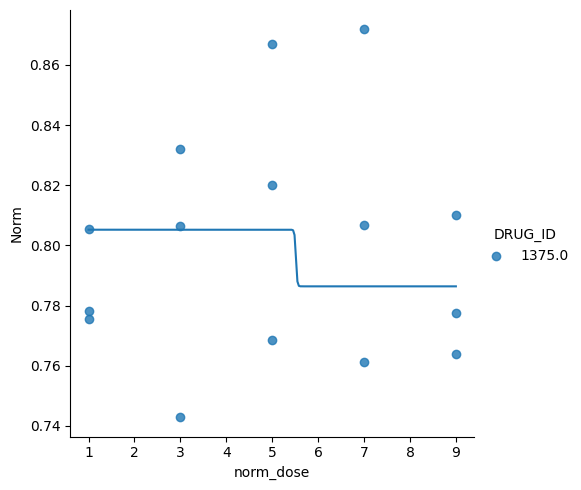

In [ ]:
refDose = np.linspace(min(tidy_2.norm_dose),max(tidy_2.norm_dose),256)
#refDose = np.linspace(min(tidy_2.logDose)*0.9,max(tidy_2.logDose)*1.1,256)
refDose = (10**-refDose)*1e6
sns.lmplot(data = tidy_2,  x= 'norm_dose',y = 'Norm', hue='DRUG_ID',fit_reg=False)
for fit in fitData:
    plt.plot([pDose(i) for i in refDose],[ll4(i,*[fit[i] for i in ['b','c','d','e']]) for i in refDose])

In [ ]:
refDose.min()

0.001

In [ ]:
refDose.max()

100000.0

## Functions for generating data for curves and drawing curves

In [ ]:
def data_for_curve(plate_layout, cell_line, drug):
    #fetch list of plate barcode ids for the chosen layout and cell line
    plate_list = barcode_fetcher(plate_layout, cell_line)    

    pos_controls = {}
    neg_controls = {}
    #choose neg and pos controls to normalise response varible
    for plate in plate_list:
        #mean_pos uses blank wells where no cells are present
        mean_pos = drop_unused.loc[(drop_unused.BARCODE==plate)&(drop_unused.TAG=='B'),'INTENSITY'].mean()
        #mean_neg = drop_unused.loc[(drop_unused.BARCODE==plate)&(drop_unused.TAG=='NC-0'),'INTENSITY'].mean() 
        #NOTE - take the neg control as the max intensity for the plate since there seems to be 
        # cases where low drug concentration wells are higher then the average negative wells.
        mean_neg = drop_unused.loc[(drop_unused.BARCODE==plate),'INTENSITY'].max()
        pos_controls[plate]=mean_pos
        neg_controls[plate]=mean_neg
    
    #make mini df of chosen plates and drug
    plates_df  = drop_unused[(drop_unused.BARCODE.isin(plate_list))&(drop_unused.DRUG_ID==drug)]
    tidy_df= plates_df[['CELL_LINE_NAME','DRUG_ID','BARCODE','CONC','INTENSITY']] 

    tidy_df['mean_pos'] = tidy_df['BARCODE'].map(pos_controls)
    tidy_df['mean_neg'] = tidy_df['BARCODE'].map(neg_controls)
    tidy_df['Norm'] = ((tidy_df.INTENSITY-tidy_df.mean_pos)/(tidy_df.mean_neg-tidy_df.mean_pos))

    tidy_2 = tidy_df.loc[:,['DRUG_ID','CONC',"Norm"]]
    
    #tidy_2['logDose'] = pDose(tidy_2.CONC)
    #normalise drug conc from 1 to 9 (note- even 5 fold dilutions will use this scale)
    tidy_2['norm_dose']=((np.log10(tidy_2['CONC']/tidy_2.loc[:,'CONC'].max()))/np.log10(2))+9
    tidy_2['logDose'] = pDose(tidy_2.norm_dose)
    tidy_2['logCONC']=pDose(tidy_2.CONC)
    return tidy_2

In [ ]:
data_for_curve('714_b_17','C32',1375)

,DRUG_ID,CONC,Norm,norm_dose,logDose,logCONC
2637606,1375.0,30.000000,0.777494,9.0,5.045757,4.522879
2637607,1375.0,7.500000,0.761255,7.0,5.154902,5.124939
2637608,1375.0,1.875000,0.768596,5.0,5.301030,5.726999
2637609,1375.0,0.468750,0.742928,3.0,5.522879,6.329059
2637610,1375.0,0.117188,0.775498,1.0,6.000000,6.931119
2642677,1375.0,30.000000,0.763850,9.0,5.045757,4.522879
2642678,1375.0,7.500000,0.871830,7.0,5.154902,5.124939
2642679,1375.0,1.875000,0.867079,5.0,5.301030,5.726999
2642680,1375.0,0.468750,0.832202,3.0,5.522879,6.329059
2642681,1375.0,0.117188,0.805451,1.0,6.000000,6.931119


In [ ]:
def curve_fit(data_df):
    compoundData = data_df.groupby(['DRUG_ID'])
    fitData = []
    for name,group in compoundData:
        fitCoefs, covMatrix = opt.curve_fit(ll4, group.norm_dose, group.Norm)
        resids = group.Norm-group.norm_dose.apply(lambda x: ll4(x,*fitCoefs))
        curFit = dict(zip(['b','c','d','e'],fitCoefs))
        curFit['compound']=name
        curFit['residuals']=sum(resids**2)
        fitData.append(curFit)
    fitCompound = [ item['compound'] for item in fitData]
    #print('fitData', fitData)
    fitTable = pd.DataFrame(fitData).set_index('compound')
    print('fitTable', fitTable)
    refDose = np.linspace(min(data_df.norm_dose),max(data_df.norm_dose),256)
    refDose = (10**-refDose)*1e6
    #print('refDose', refDose)
    sns.lmplot(data = data_df,  x= 'norm_dose',y = 'Norm', hue='DRUG_ID',fit_reg=False)
    #ax.set_ylim(0,1)
    for fit in fitData:
        curve = plt.plot([pDose(i) for i in refDose],[ll4(i,*[fit[i] for i in ['b','c','d','e']]) for i in refDose])
        #curve.set_ylim(0, 1)
        #curve = plt.plot([pDose(i) for i in refDose],[ll4(i,*[fit[i] for i in ['b','c','d','e']]) for i in refDose])

    return curve

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\4007547668.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


fitTable                   b         c         d         e  residuals
compound                                                    
1375.0    32.070657  0.805246  0.786418  3.039969    0.01904


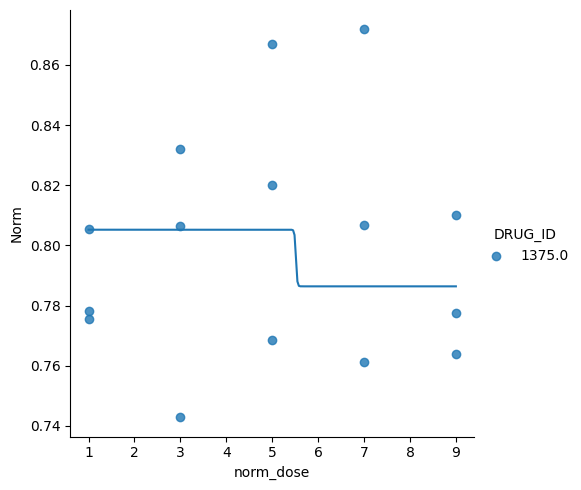

In [ ]:
curve_fit(data_for_curve('714_b_17','C32',1375))

In [ ]:
data_for_curve('714_b_17','A375',1375)

,DRUG_ID,CONC,Norm,norm_dose,logDose,logCONC
2634167,1375.0,30.000000,0.470438,9.0,5.045757,4.522879
2634168,1375.0,7.500000,0.527917,7.0,5.154902,5.124939
2634169,1375.0,1.875000,0.531163,5.0,5.301030,5.726999
2634170,1375.0,0.468750,0.580042,3.0,5.522879,6.329059
2634171,1375.0,0.117188,0.635891,1.0,6.000000,6.931119
2637407,1375.0,30.000000,0.629171,9.0,5.045757,4.522879
2637408,1375.0,7.500000,0.723826,7.0,5.154902,5.124939
2637409,1375.0,1.875000,0.787145,5.0,5.301030,5.726999
2637410,1375.0,0.468750,0.755573,3.0,5.522879,6.329059
2637411,1375.0,0.117188,0.855146,1.0,6.000000,6.931119


In [ ]:
data_for_curve('714_b_17','HT-29',1375)

,DRUG_ID,CONC,Norm,norm_dose,logDose,logCONC
2634530,1375.0,30.000000,0.942033,9.0,5.045757,4.522879
2634531,1375.0,7.500000,0.966403,7.0,5.154902,5.124939
2634532,1375.0,1.875000,0.934706,5.0,5.301030,5.726999
2634533,1375.0,0.468750,0.895530,3.0,5.522879,6.329059
2634534,1375.0,0.117188,0.887339,1.0,6.000000,6.931119
2644106,1375.0,30.000000,0.860316,9.0,5.045757,4.522879
2644107,1375.0,7.500000,0.923304,7.0,5.154902,5.124939
2644108,1375.0,1.875000,0.852563,5.0,5.301030,5.726999
2644109,1375.0,0.468750,0.830448,3.0,5.522879,6.329059
2644110,1375.0,0.117188,0.863029,1.0,6.000000,6.931119


C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\4151788788.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


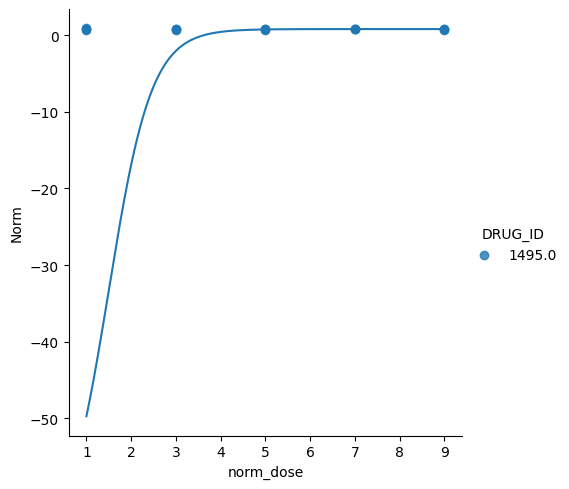

In [ ]:
curve_fit(data_for_curve('714_b_17','C32',1495))

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\2124577317.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


fitData [{'b': 1.996218191700791, 'c': -269.0080913145872, 'd': 0.8766790408786713, 'e': 344.7957640456384, 'compound': 1261.0, 'residuals': 0.03095816690114499}]
fitTable                  b           c         d           e  residuals
compound                                                       
1261.0    1.996218 -269.008091  0.876679  344.795764   0.030958
refDose [1.00000000e+05 9.30309490e+04 8.65475746e+04 8.05160300e+04
 7.49048268e+04 6.96846712e+04 6.48283108e+04 6.03103928e+04
 5.61073307e+04 5.21971822e+04 4.85595339e+04 4.51753952e+04
 4.20270989e+04 3.90982089e+04 3.63734348e+04 3.38385515e+04
 3.14803256e+04 2.92864456e+04 2.72454583e+04 2.53467084e+04
 2.35802834e+04 2.19369614e+04 2.04081633e+04 1.89859080e+04
 1.76627704e+04 1.64318429e+04 1.52866994e+04 1.42213615e+04
 1.32302676e+04 1.23082435e+04 1.14504757e+04 1.06524862e+04
 9.91010900e+03 9.21946845e+03 8.57695899e+03 7.97922634e+03
 7.42314998e+03 6.90582687e+03 6.42455627e+03 5.97682566e+03
 5.56029763e+03 5.

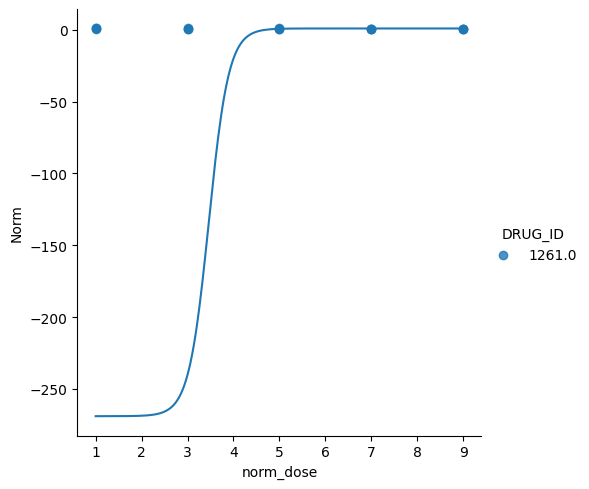

In [ ]:
curve_fit(data_for_curve('714_b_17','C32',1261))

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\4151788788.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


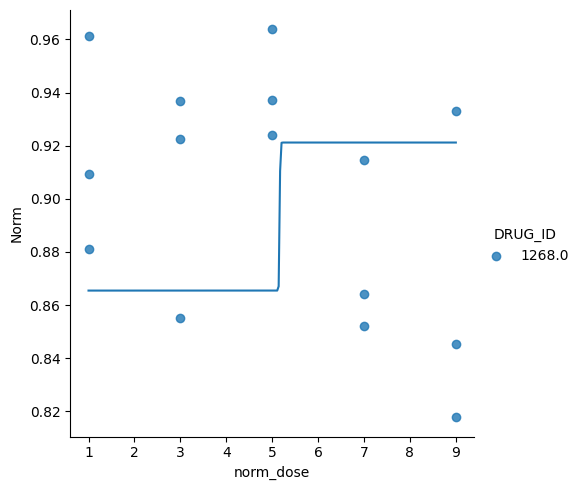

In [ ]:
curve_fit(data_for_curve('714_b_17','C32',1268))

In [ ]:
#curve_fit(data_for_curve('507_c_5','ES1',1072))

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\4151788788.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


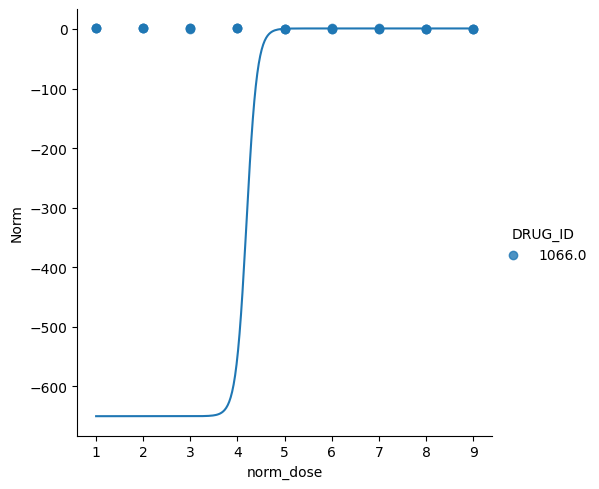

In [ ]:
curve_fit(data_for_curve('507_c_5','ES1',1066))

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_2960\63559802.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


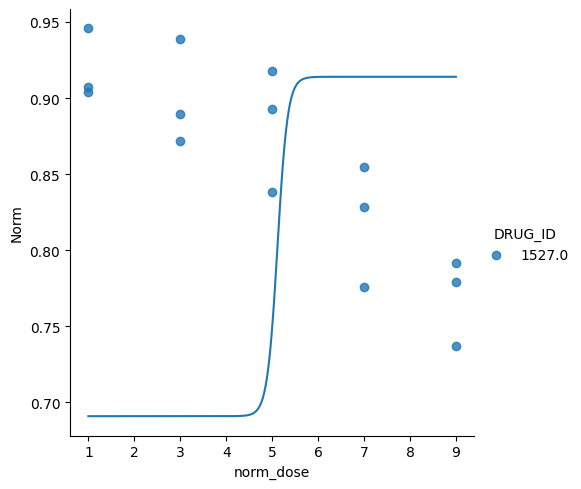

In [ ]:
curve_fit(data_for_curve('713_m_17','SW620',1527))

C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_2960\63559802.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


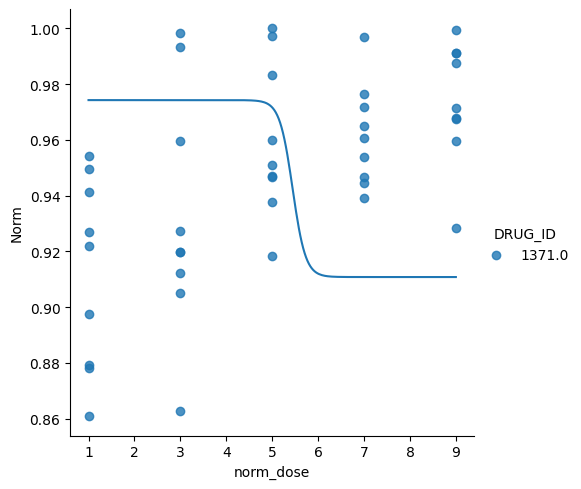

In [ ]:
curve_fit(data_for_curve('713_m_17','SW620',1371))

In [ ]:
data_for_curve('714_b_17','SK-MEL-2',1373)

,DRUG_ID,CONC,Norm,norm_dose,logDose,logCONC
2637314,1373.0,10.000000,0.373253,9.0,5.045757,5.00000
2637315,1373.0,2.500000,0.229700,7.0,5.154902,5.60206
2637316,1373.0,0.625000,0.498300,5.0,5.301030,6.20412
2637317,1373.0,0.156250,0.714474,3.0,5.522879,6.80618
2637318,1373.0,0.039062,0.760329,1.0,6.000000,7.40824
2647119,1373.0,10.000000,0.421146,9.0,5.045757,5.00000
2647120,1373.0,2.500000,0.246708,7.0,5.154902,5.60206
2647121,1373.0,0.625000,0.489806,5.0,5.301030,6.20412
2647122,1373.0,0.156250,0.802356,3.0,5.522879,6.80618
2647123,1373.0,0.039062,0.827912,1.0,6.000000,7.40824


C:\Users\dunphsi1\AppData\Local\Temp\1\ipykernel_4688\2124577317.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in compoundData:


fitData [{'b': 60.17035940365183, 'c': 0.3127782585222997, 'd': 0.7572434013434292, 'e': 4.977289519465685, 'compound': 1373.0, 'residuals': 0.05180217367967276}]
fitTable                   b         c         d        e  residuals
compound                                                   
1373.0    60.170359  0.312778  0.757243  4.97729   0.051802
refDose [1.00000000e+05 9.30309490e+04 8.65475746e+04 8.05160300e+04
 7.49048268e+04 6.96846712e+04 6.48283108e+04 6.03103928e+04
 5.61073307e+04 5.21971822e+04 4.85595339e+04 4.51753952e+04
 4.20270989e+04 3.90982089e+04 3.63734348e+04 3.38385515e+04
 3.14803256e+04 2.92864456e+04 2.72454583e+04 2.53467084e+04
 2.35802834e+04 2.19369614e+04 2.04081633e+04 1.89859080e+04
 1.76627704e+04 1.64318429e+04 1.52866994e+04 1.42213615e+04
 1.32302676e+04 1.23082435e+04 1.14504757e+04 1.06524862e+04
 9.91010900e+03 9.21946845e+03 8.57695899e+03 7.97922634e+03
 7.42314998e+03 6.90582687e+03 6.42455627e+03 5.97682566e+03
 5.56029763e+03 5.17279765e+03

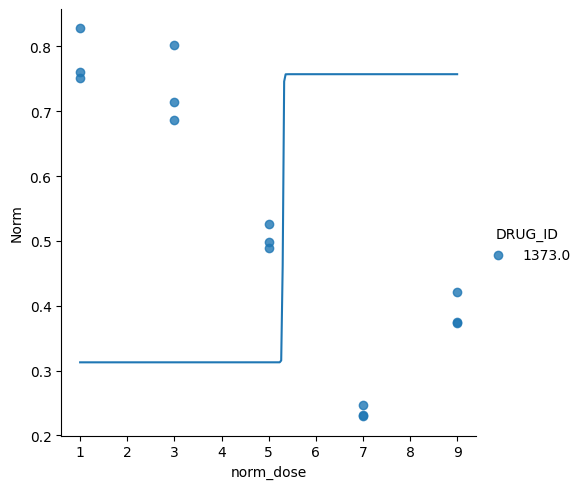

In [ ]:
curve_fit(data_for_curve('714_b_17','SK-MEL-2',1373))